In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_risk_prediction_dataset.csv to diabetes_risk_prediction_dataset (5).csv


資料來源:https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction

In [ ]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('diabetes_risk_prediction_dataset.csv')


print(data.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 假设您已经有了data
# 将数据转换为DataFrame


# 显示划分后的训练集和测试集大小
print("训练集大小：", X_train.shape)
print("测试集大小：", X_test.shape)


训练集大小： (416, 16)
测试集大小： (104, 16)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 假设您已经有了data
# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 将 'Gender' 列转换为整数值
gender_label_encoder = LabelEncoder()
df['Gender'] = gender_label_encoder.fit_transform(df['Gender'])

# 需要转换为整数值的列名列表
columns_to_convert = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                      'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
                      'Irritability', 'delayed healing', 'partial paresis',
                      'muscle stiffness', 'Alopecia', 'Obesity','class']

# 将 'yes' 和 'no' 转换为整数值
for column in columns_to_convert:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

# 显示转换后的数据类型
print(df.dtypes)

# 划分特征和目标变量
X = df.drop(columns=['class'])  # 特征
y = df['class']  # 目标变量



Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 对训练集进行特征缩放
X_train_scaled = scaler.fit_transform(X_train)

# 对测试集进行特征缩放
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("測試準確率：", accuracy)

print(classification_report(y_test, y_pred))

測試準確率： 0.9903846153846154
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



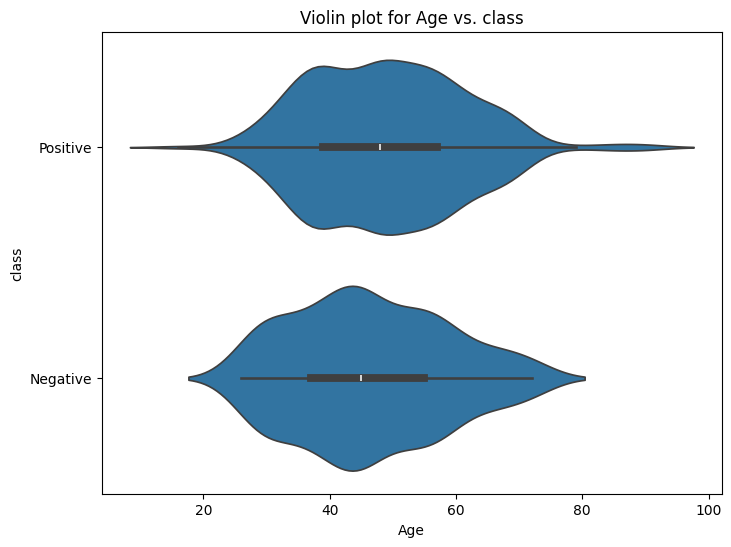

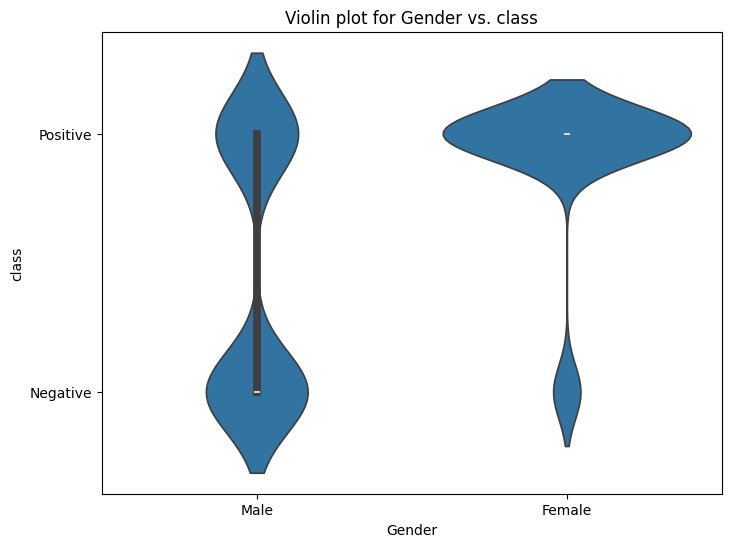

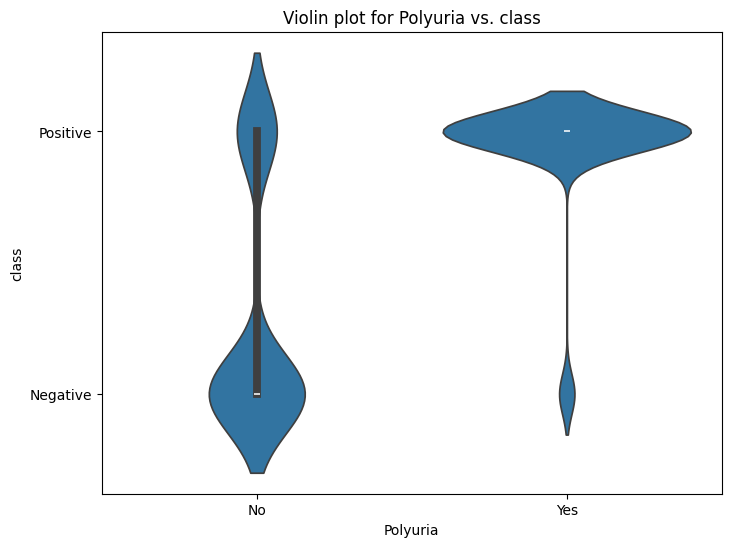

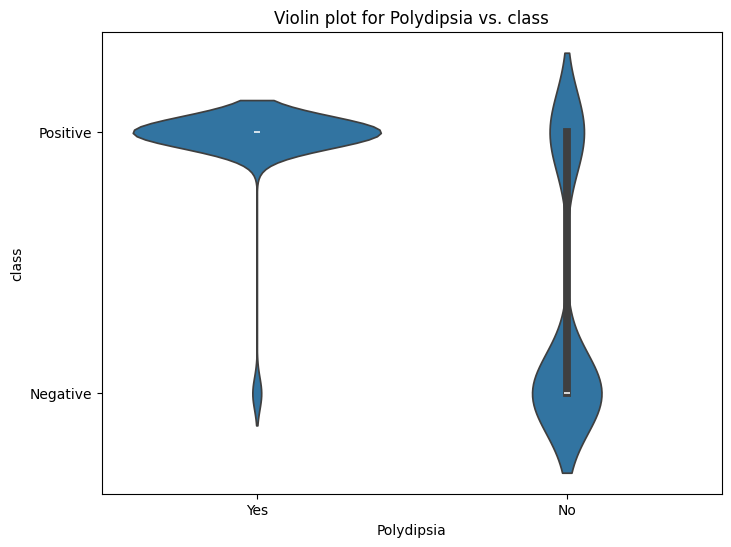

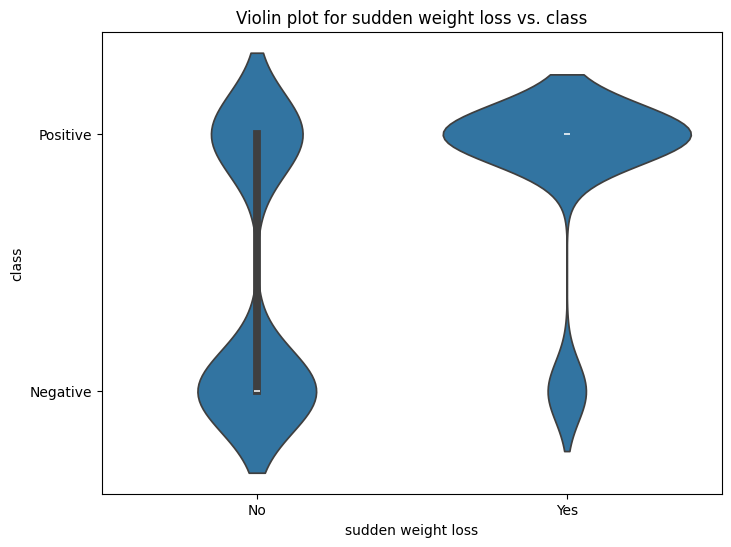

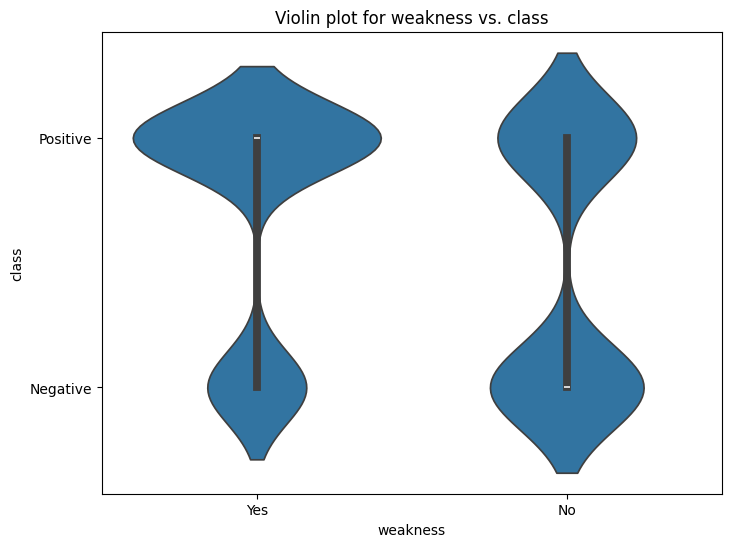

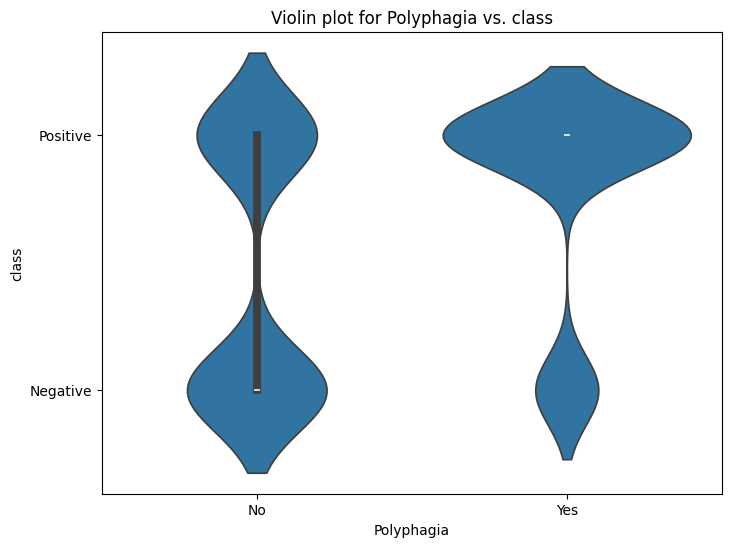

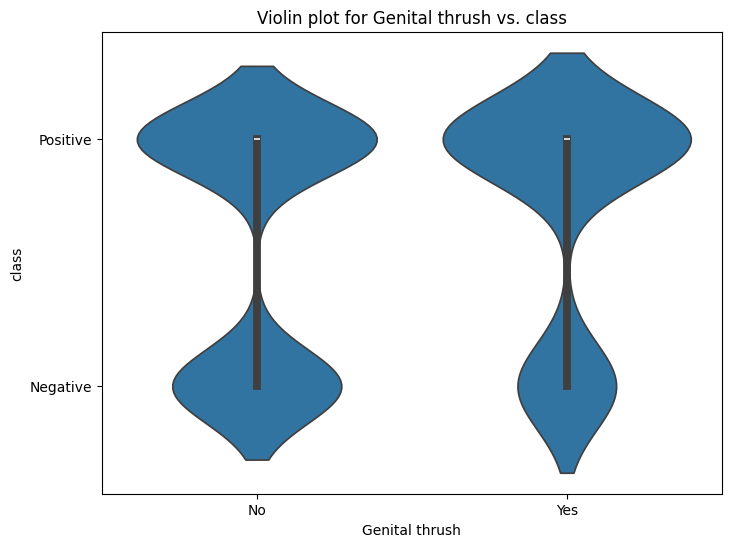

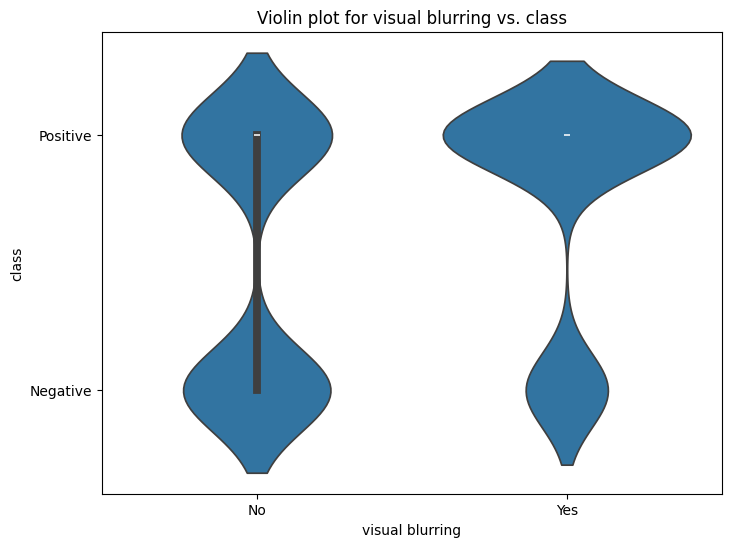

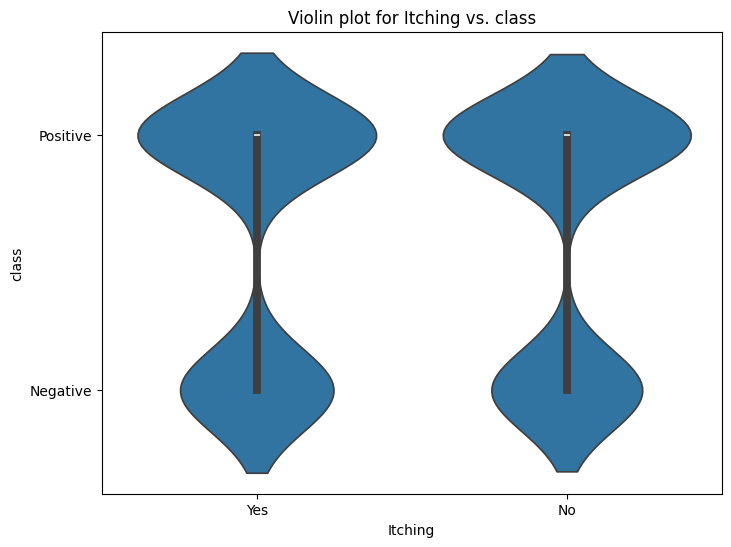

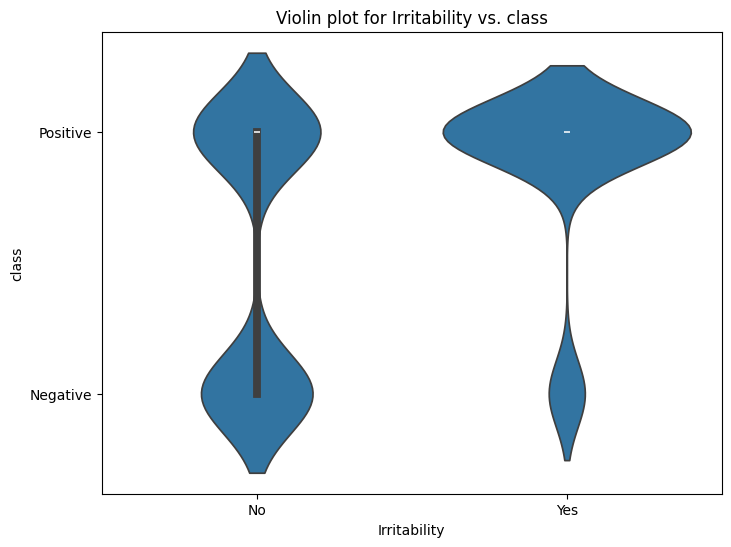

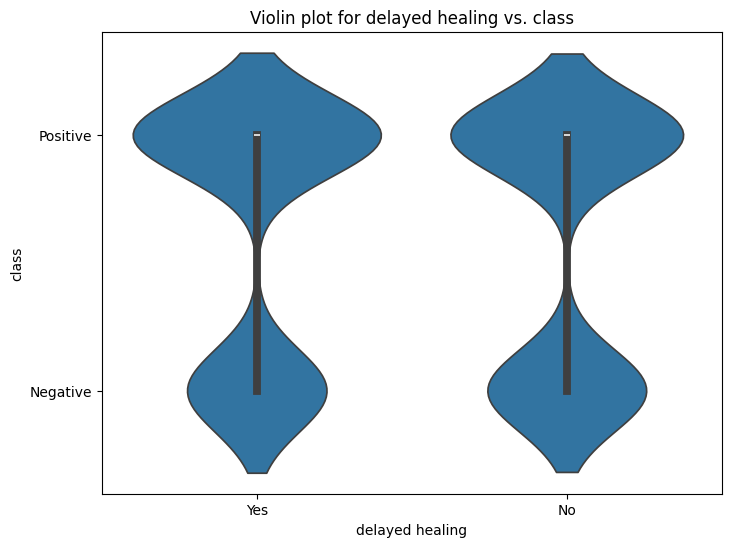

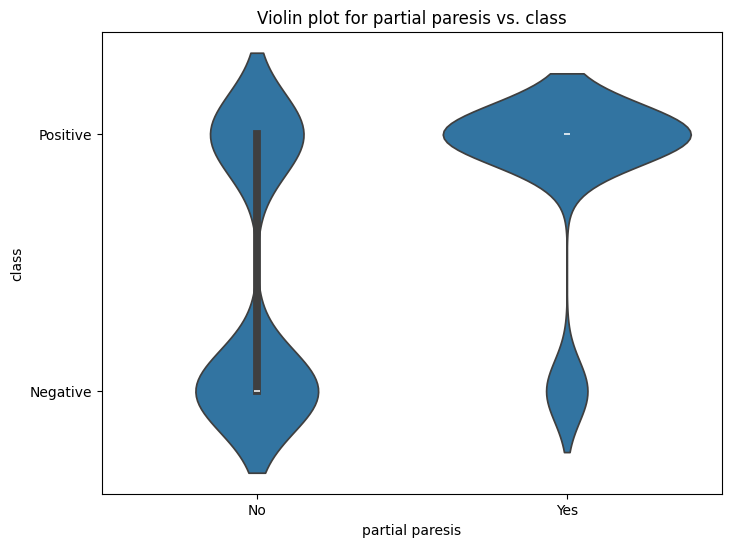

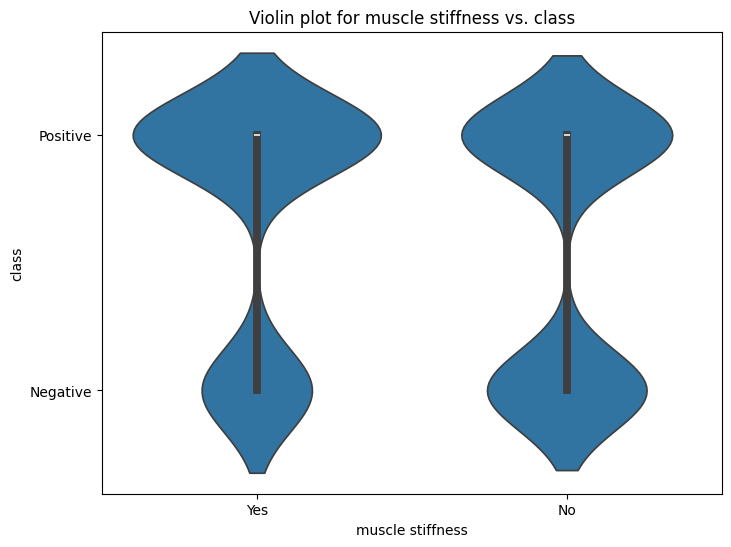

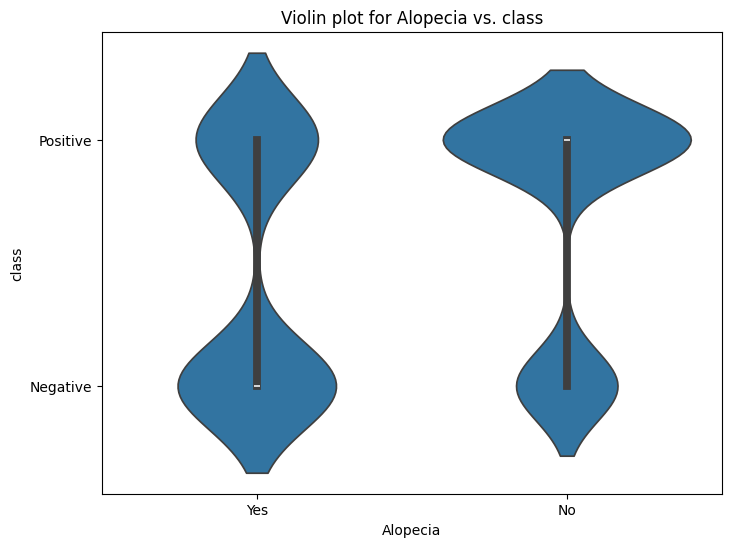

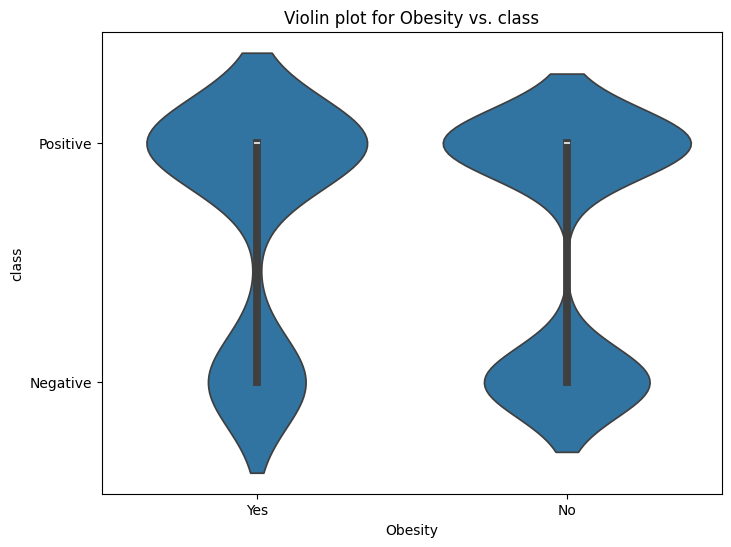

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设您已经有了data
# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 获取除了'class'列之外的所有特征列名
feature_columns = df.columns.drop('class')

# 使用循环绘制每个特征值的小提琴图
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=feature, y='class', data=df)
    plt.title(f'Violin plot for {feature} vs. class')
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.show()


In [ ]:
# 排除'class'列
correlation = df.drop('class', axis=1).corrwith(df['class']).abs().sort_values(ascending=False)

# 显示相关性排序
print(correlation)


Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
dtype: float64


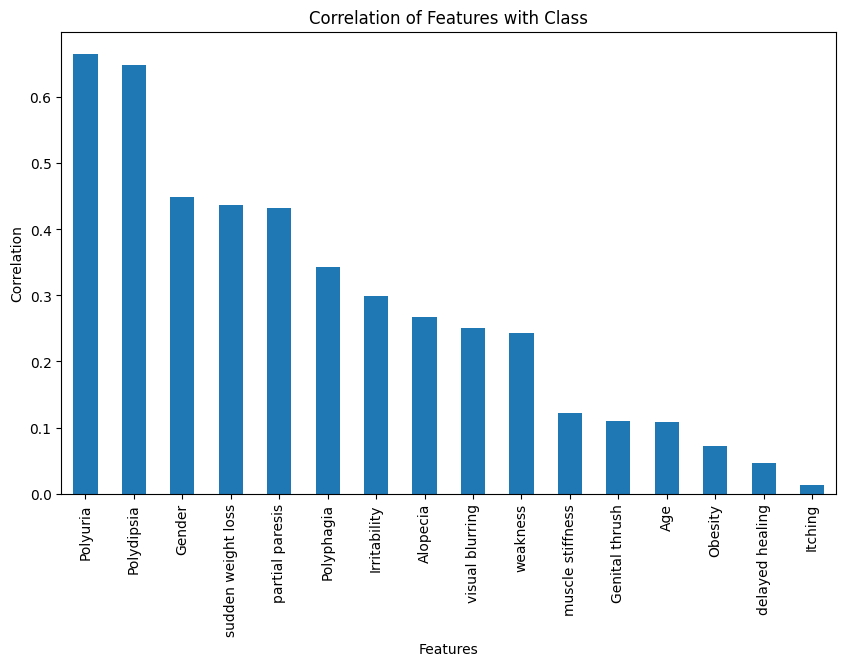

In [ ]:
import matplotlib.pyplot as plt

# 排除'class'列
correlation = df.drop('class', axis=1).corrwith(df['class']).abs().sort_values(ascending=False)

# 创建柱状图
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title('Correlation of Features with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()
